<a href="https://colab.research.google.com/github/saishshinde15/NLP/blob/main/Sentiment_analysis_ANN(improved_loss).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
!wget -nc https://lazyprogrammer.me/course_files/AirlineTweets.csv

--2024-03-27 05:03:40--  https://lazyprogrammer.me/course_files/AirlineTweets.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 172.67.213.166, 104.21.23.210, 2606:4700:3031::6815:17d2, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|172.67.213.166|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3421431 (3.3M) [text/csv]
Saving to: ‘AirlineTweets.csv’

AirlineTweets.csv   100%[===================>]   3.26M  19.7MB/s    in 0.2s    

2024-03-27 05:03:41 (19.7 MB/s) - ‘AirlineTweets.csv’ saved [3421431/3421431]



In [3]:
dataset=pd.read_csv('AirlineTweets.csv')

In [4]:
dataset

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,...,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,...,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,...,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,...,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,...,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,...,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)
...,...,...,...,...,...,...,...,...,...,...,...
14635,569587686496825344,positive,0.3487,NaN,0.0000,...,@AmericanAir thank you we got on a different f...,NaN,2015-02-22 12:01:01 -0800,NaN,NaN
14636,569587371693355008,negative,1.0000,Customer Service Issue,1.0000,...,@AmericanAir leaving over 20 minutes Late Flig...,NaN,2015-02-22 11:59:46 -0800,Texas,NaN
14637,569587242672398336,neutral,1.0000,NaN,NaN,...,@AmericanAir Please bring American Airlines to...,NaN,2015-02-22 11:59:15 -0800,"Nigeria,lagos",NaN
14638,569587188687634433,negative,1.0000,Customer Service Issue,0.6659,...,"@AmericanAir you have my money, you change my ...",NaN,2015-02-22 11:59:02 -0800,New Jersey,Eastern Time (US & Canada)


In [5]:
X=dataset['text']

In [6]:
X

0                      @VirginAmerica What @dhepburn said.
1        @VirginAmerica plus you've added commercials t...
2        @VirginAmerica I didn't today... Must mean I n...
3        @VirginAmerica it's really aggressive to blast...
4        @VirginAmerica and it's a really big bad thing...
                               ...                        
14635    @AmericanAir thank you we got on a different f...
14636    @AmericanAir leaving over 20 minutes Late Flig...
14637    @AmericanAir Please bring American Airlines to...
14638    @AmericanAir you have my money, you change my ...
14639    @AmericanAir we have 8 ppl so we need 2 know h...
Name: text, Length: 14640, dtype: object

In [7]:
y=dataset['airline_sentiment']

In [8]:
y

0         neutral
1        positive
2         neutral
3        negative
4        negative
           ...   
14635    positive
14636    negative
14637     neutral
14638    negative
14639     neutral
Name: airline_sentiment, Length: 14640, dtype: object

In [9]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)


In [10]:
y

array([1, 2, 1, ..., 1, 0, 1])

In [12]:
from sklearn.model_selection import train_test_split
X_train_input, X_test_input, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [13]:
len(X_train_input)

11712

In [15]:
len(y_train)

11712

In [16]:
vectorizer=TfidfVectorizer()

In [17]:
X_train=vectorizer.fit_transform(X_train_input)
X_test=vectorizer.transform(X_test_input)

In [18]:
X_train=X_train.toarray()
X_test=X_test.toarray()

In [20]:
import tensorflow as tf

In [21]:
ann=tf.keras.models.Sequential()

In [22]:
n_input=X_train.shape[1]

In [23]:
n_input

13267

In [46]:
ann.add(tf.keras.layers.Dense(units=100,input_dim=n_input,activation='relu'))

In [47]:
ann.add(tf.keras.layers.Dropout(rate=0.5))

In [48]:
ann.add(tf.keras.layers.Dense(units=100,activation='relu'))

In [49]:
ann.add(tf.keras.layers.Dropout(rate=0.5))

In [50]:
ann.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))

In [51]:
ann.compile(tf.keras.optimizers.Adam(learning_rate=0.00001),loss='binary_crossentropy',metrics=['accuracy'])

In [52]:
history=ann.fit(X_train,y_train,batch_size=32,epochs=10,validation_data=[X_test,y_test])

Epoch 1/10
366/366 [==============================] - 31s 77ms/step - loss: 0.6329 - accuracy: 0.7565 - val_loss: 0.6481 - val_accuracy: 0.6718
Epoch 2/10
366/366 [==============================] - 32s 88ms/step - loss: 0.5977 - accuracy: 0.7834 - val_loss: 0.6261 - val_accuracy: 0.6718
Epoch 3/10
366/366 [==============================] - 34s 93ms/step - loss: 0.5617 - accuracy: 0.7890 - val_loss: 0.6026 - val_accuracy: 0.6718
Epoch 4/10
366/366 [==============================] - 32s 88ms/step - loss: 0.5218 - accuracy: 0.7900 - val_loss: 0.5767 - val_accuracy: 0.6718
Epoch 5/10
366/366 [==============================] - 35s 95ms/step - loss: 0.4822 - accuracy: 0.7904 - val_loss: 0.5503 - val_accuracy: 0.6718
Epoch 6/10
366/366 [==============================] - 35s 96ms/step - loss: 0.4361 - accuracy: 0.7906 - val_loss: 0.5226 - val_accuracy: 0.6718
Epoch 7/10
366/366 [==============================] - 33s 91ms/step - loss: 0.3939 - accuracy: 0.7907 - val_loss: 0.4943 - val_accuracy:

<Axes: >

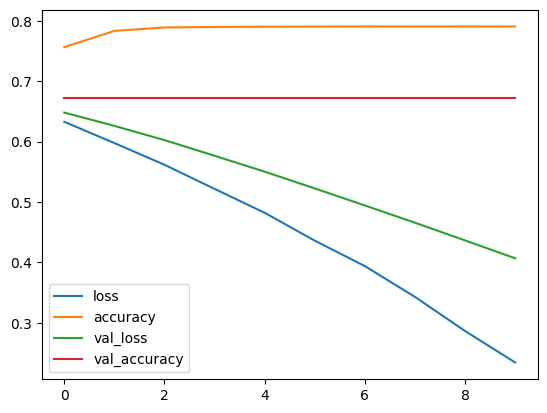

In [53]:
pd.DataFrame(history.history).plot()

In [54]:
ann.evaluate(X_train,y_train)

366/366 [==============================] - 10s 28ms/step - loss: 0.2084 - accuracy: 0.7909


[0.20835797488689423, 0.7908982038497925]

In [55]:
ann.evaluate(X_test,y_test)

92/92 [==============================] - 1s 12ms/step - loss: 0.4069 - accuracy: 0.6718


[0.40688368678092957, 0.6717896461486816]

In [56]:
y_pred=ann.predict(X_test)

92/92 [==============================] - 5s 51ms/step


In [57]:
y_pred=y_pred > 0.5

In [58]:
y_pred

array([[ True],
       [False],
       [False],
       ...,
       [False],
       [ True],
       [False]])

In [59]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.90      0.85      1889
           1       0.32      0.47      0.38       580
           2       0.00      0.00      0.00       459

    accuracy                           0.67      2928
   macro avg       0.38      0.46      0.41      2928
weighted avg       0.59      0.67      0.63      2928



In [60]:
ann.layers